분포가설->동시발생행렬->통계발생기법의 문제점 -> 신경망 가중치 사용으로 확률로 예측


## 추론(예측) 기반 기법과 신경망

## word2vec : 워드투벡터
2013년 구글의 토마스미콜로프(Tomas Mikolov)의 팀이 개발<br>
<b>word2vec</b> 알고리즘은 <b>신경망 모델</b>을 사용 하여 큰 텍스트 코퍼스에서 단어 연관성을 학습. 학습이 끝나면 이러한 모델은 동의어 단어를 감지하거나 부분 문장에 대한 추가 단어를 제안 할 수 있다. word2vec는 <b>벡터</b> 라고하는 특정 숫자 목록을 사용하여 각각의 고유 한 단어를 나타낸다 . 벡터는 간단한 수학적 함수 ( 벡터 간의 코사인 유사성 ) 가 해당 벡터가 나타내는 단어 간의 의미 유사성 수준을 나타내 도록 신중하게 선택 된다.


### 신경망에서의 단어 처리

In [1]:
import numpy as np

text = 'You say goodbye and I say hello'

# {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

c = np.array([[1,0,0,0,0,0,0]])
W=np.random.randn(7,3)

h = np.matmul(c,W)
h

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


array([[-1.42690465,  1.62331468, -0.49903998]])

## 단순한 word2vec

### CBOW (Continuous Bag of Words) 모델

#### Word2Vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있다
- $ CBOW $ 는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법 <br>
  타깃(target)은 중앙 단어 그 주변 단어들이 맥락(contexts)이다
- $ Skip-Gram $ 은 중간에 있는 단어로 주변 단어들을 예측하는 방법

#### BOW(Bag of Words) : 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

BOW를 만드는 과정<br>
(1) 우선, 각 단어의 고유한 인덱스(Index)를 부여한다.<br>
(2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터(Vector)를 만든다.<br>

"정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."<br>
('정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9) <br>
BOW: [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]  ==> '가' 와 '물가상승률' 은 2회 발생

https://wikidocs.net/22650


### 학습 데이터 준비

맥락과 타깃을 생성

In [2]:
from mynlp import preprocess, create_contexts_target,convert_one_hot

In [3]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)      # 8개
print(id_to_word)  # 7개
print(word_to_id)  # 7개

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [4]:
contexts,target = create_contexts_target(corpus,window_size=1)
print(contexts,contexts.shape)
# 맥락(contexts) : 예측할 단어의 주변 단어
# {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
# window_size=1 일 경우 : 주변 단어를 중간 단어에 앞,뒤로 1개만 사용
# [[0 2]   : 'you', 'goodbye'
#  [1 3]   : 'say', 'and'
#  [2 4]   : 'goodbye', 'i'
#  [3 1]   : 'and', 'say'
#  [4 5]   : 'i', 'hello'
#  [1 6]]  : 'say', '.'
print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]] (6, 2)
[1 2 3 4 1 5]


In [5]:
vocab_size = len(word_to_id)
target = convert_one_hot(target,  vocab_size)
print(target,target.shape)

[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)


In [6]:
contexts = convert_one_hot(contexts,vocab_size)
print(contexts) 
print(contexts.shape)

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]
(6, 2, 7)


### CBOW 신경망 모델 구현

In [7]:
from nn_layers import Matmul, SoftmaxWithLoss, Adam


class SimpleCBOW:
    def __init__(self,vocab_size,hidden_size):  # 어휘수 : 7개, 은닉층의 뉴런 : 5
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01*np.random.randn(V,H).astype('f')  # (7,5)
        W_out = 0.01*np.random.randn(H,V).astype('f') # (5,7)
        
        # 계층 생성
        self.in_layer0 = Matmul(W_in)
        self.in_layer1 = Matmul(W_in)
        self.out_layer = Matmul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다
        layers = [self.in_layer0,self.in_layer1,self.out_layer]
        self.params, self.grads = [],[]
        for layer in layers: # 3회
            self.params += layer.params
            self.grads += layer.grads
       
        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vec = W_in     
        
    def predict(self,contexts) :  # contexts : (6,2,7)  
        h0 = self.in_layer0.forward(contexts[:,0,:])  # (6,7), , 맥락의 첫번째 단어 
        h1 = self.in_layer1.forward(contexts[:,1,:])  # (6,7), , 맥락의 두번째 단어 
        
        h = (h0 + h1) * 0.5    # 평균
        
        score = self.out_layer.forward(h)
        return self.loss_layer.softmax(score) # softmax()함수로 확률값으로 출력
    
    def forward(self,contexts,target): # contexts : (6,2,7), target : (6,7)
        h0 = self.in_layer0.forward(contexts[:,0,:])  # (6,7), , 맥락의 첫번째 단어 
        h1 = self.in_layer1.forward(contexts[:,1,:])  # (6,7), , 맥락의 두번째 단어 
        
        h = (h0 + h1) * 0.5   # 평균
        
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score,target)
        return loss
    
    def backward(self,dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer0.backward(da)
        self.in_layer1.backward(da)
        return None

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)  # 7
contexts,target = create_contexts_target(corpus,window_size)

target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(contexts,contexts.shape)  # (6, 2, 7)
print(target,target.shape)  # (6,7)


[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)


In [9]:
# 학습
from nn_layers import  Matmul, SoftmaxWithLoss,Adam,SGD,Trainer
model = SimpleCBOW(vocab_size,hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts,target,max_epoch,batch_size)


| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 383 |  반복 1 / 2 | 시간 0[s] | 손실 0.78
| 에폭 384 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 385 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 386 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 387 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 388 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 389 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 390 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 391 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 392 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 393 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 394 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 395 |  반복 1 / 2 | 시간 0[s] | 손실 0.91
| 에폭 396 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 397 |  반복 1 / 2 | 시간 0[s] | 손실 0.98
| 에폭 398 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 399 |  반복 1 / 2 | 시간 0[s] | 손실 0.90
| 에폭 400 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 401 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 402 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 403 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 404 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 405 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 406 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 407 |  반복 1

| 에폭 792 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 793 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 794 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 795 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 796 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 797 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 798 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 799 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 800 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 801 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 802 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 803 |  반복 1 / 2 | 시간 0[s] | 손실 0.52
| 에폭 804 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 805 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 806 |  반복 1 / 2 | 시간 0[s] | 손실 0.45
| 에폭 807 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 808 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 809 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 810 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 811 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 812 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 813 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 814 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 815 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 816 |  반복 1

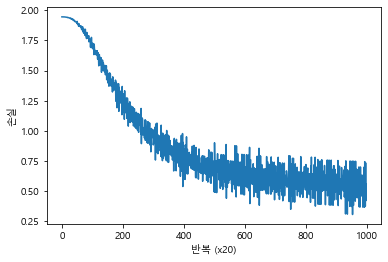

In [10]:
trainer.plot()

In [11]:
# W_in : 인스턴스 변수에 단어의 분산 표현
word_vecs = model.word_vec   
for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

       you :  [-1.1301615  1.0703769  1.0799417 -1.1114006 -1.2878555]
       say :  [ 0.20434768 -1.1971922  -1.2078276   1.1595615   0.04174792]
   goodbye :  [-0.8670969   0.69342184  0.679788   -0.6861617  -0.6607578 ]
       and :  [ 1.5262994  -0.9642198  -0.9721342   0.94711506 -1.766688  ]
         i :  [-0.8552625   0.68937975  0.6855158  -0.6906881  -0.6603252 ]
     hello :  [-1.1375933  1.0687411  1.0852443 -1.1139702 -1.2766924]
         . :  [-1.4850022 -1.0870955 -1.046469   1.0559794  1.396044 ]


In [12]:
# 예측
h = model.predict(contexts)
print(h,h.shape)  # (6,7)
print('예측값:',np.argmax(h,axis=1))
print('실제값:',np.argmax(target,axis=1))

[[3.66512889e-03 7.24638441e-01 1.89376526e-03 2.62973879e-01
  1.82605479e-03 1.35152268e-03 3.65120836e-03]
 [4.48777995e-03 1.13702317e-03 4.85019343e-01 1.59254629e-03
  4.84525733e-01 1.87974246e-02 4.44015005e-03]
 [1.15245141e-02 6.53084679e-01 5.70582456e-03 3.05947185e-01
  5.55335069e-03 6.68088206e-03 1.15035649e-02]
 [4.48777995e-03 1.13702317e-03 4.85019343e-01 1.59254629e-03
  4.84525733e-01 1.87974246e-02 4.44015005e-03]
 [3.70928423e-03 7.24300228e-01 1.88561346e-03 2.63236669e-01
  1.81833065e-03 1.35402391e-03 3.69585146e-03]
 [3.77578922e-03 3.43164451e-04 1.90615041e-02 7.74319513e-04
  1.93687363e-02 9.52865514e-01 3.81097248e-03]] (6, 7)
예측값: [1 2 1 2 1 5]
실제값: [1 2 3 4 1 5]


In [13]:
# 정확도
preds = np.argmax(h,1)
t = np.argmax(target,1)
print('target :',t)
print('predict:',preds)
accuracy = np.sum(np.equal(preds,t))/len(t)
print('정확도:', np.round(accuracy,4))

target : [1 2 3 4 1 5]
predict: [1 2 1 2 1 5]
정확도: 0.6667


In [14]:
for idx in range(len(t)):
    print(id_to_word[t[idx]], ' : ', id_to_word[preds[idx]])

say  :  say
goodbye  :  goodbye
and  :  say
i  :  goodbye
say  :  say
hello  :  hello


## skip-gram모델 구현

In [19]:
from mynlp import preprocess, create_co_matrix, cos_similarity, most_similar,\
create_contexts_target, convert_one_hot
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

from nn_layers import  Matmul, SoftmaxWithLoss,Adam,SGD,Trainer


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):  # 어휘 수 : 7개, 은닉 층의 뉴런수 5
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = Matmul(W_in)   # (6,7)*(7,5) = (6,5)
        self.out_layer = Matmul(W_out) # (6,5)*(5,7) = (6,7) 
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def predict(self,target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        return s 

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

In [17]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [20]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 297 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 298 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 299 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 300 |  반복 1 / 2 | 시간 0[s] | 손실 2.24
| 에폭 301 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 302 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 303 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 304 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 305 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 306 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 307 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 308 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 309 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 310 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 311 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 312 |  반복 1 / 2 | 시간 0[s] | 손실 2.21
| 에폭 313 |  반복 1 / 2 | 시간 0[s] | 손실 2.59
| 에폭 314 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 315 |  반복 1 / 2 | 시간 0[s] | 손실 2.63
| 에폭 316 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 317 |  반복 1 / 2 | 시간 0[s] | 손실 2.45
| 에폭 318 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 319 |  반복 1 / 2 | 시간 0[s] | 손실 2.26
| 에폭 320 |  반복 1 / 2 | 시간 0[s] | 손실 2.33
| 에폭 321 |  반복 1

| 에폭 647 |  반복 1 / 2 | 시간 0[s] | 손실 1.51
| 에폭 648 |  반복 1 / 2 | 시간 0[s] | 손실 2.36
| 에폭 649 |  반복 1 / 2 | 시간 0[s] | 손실 1.52
| 에폭 650 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 651 |  반복 1 / 2 | 시간 0[s] | 손실 2.17
| 에폭 652 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 653 |  반복 1 / 2 | 시간 0[s] | 손실 2.15
| 에폭 654 |  반복 1 / 2 | 시간 0[s] | 손실 1.72
| 에폭 655 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 656 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 657 |  반복 1 / 2 | 시간 0[s] | 손실 1.93
| 에폭 658 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 659 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 660 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 661 |  반복 1 / 2 | 시간 0[s] | 손실 2.16
| 에폭 662 |  반복 1 / 2 | 시간 0[s] | 손실 1.49
| 에폭 663 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 664 |  반복 1 / 2 | 시간 0[s] | 손실 2.15
| 에폭 665 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 666 |  반복 1 / 2 | 시간 0[s] | 손실 2.14
| 에폭 667 |  반복 1 / 2 | 시간 0[s] | 손실 1.73
| 에폭 668 |  반복 1 / 2 | 시간 0[s] | 손실 1.72
| 에폭 669 |  반복 1 / 2 | 시간 0[s] | 손실 2.15
| 에폭 670 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 671 |  반복 1

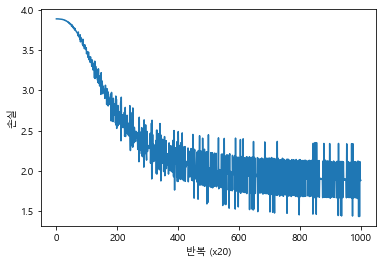

In [21]:
trainer.plot()

In [22]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

       you :  [ 0.00340597  0.00218767 -0.00924794  0.00679936  0.00422625]
       say :  [ 0.9348589 -0.7649802 -0.9917895 -0.9465931 -1.0266154]
   goodbye :  [-0.7387872   0.8928454   0.77714944  0.74597955  1.0999545 ]
       and :  [ 0.93186957 -1.0433146  -0.8965209  -0.9394784   1.3273267 ]
         i :  [-0.74335593  0.8832378   0.77224827  0.75211877  1.1004642 ]
     hello :  [-0.9325153   0.76812845  0.9760159   0.9362953  -1.4010307 ]
         . :  [ 0.00996695 -0.00789601  0.00236939  0.02245814 -0.00097379]


In [23]:
h = model.predict(target[0,:])  # [0 1 0 0 0 0 0] ,'say'
print(h.shape)  # (7,)
print(h)
pred0 = np.argmax(h,0)
h1 = h
h[pred0] = 0
pred1 = np.argmax(h1,0)
c0 = np.argmax(contexts[0,0,:],0)
c1 = np.argmax(contexts[0,1,:],0)
print('context : ',c0,c1)       # 0,2 : 'you' 와 'goodbye'
print('predict : ',pred0,pred1)  # 2,4 : 'goodbye' 와 'i'
print('-'*50)

h = model.predict(target[1,:])  # [0 0 1 0 0 0 0] ,'goobye'
pred0 = np.argmax(h,0)
h1 = h
h[pred0] = 0
pred1 = np.argmax(h1,0)
c0 = np.argmax(contexts[1,0,:],0) # 1,3 : 'say' 와 'and'
c1 = np.argmax(contexts[1,1,:],0) # 1,3 : 'say' 와 'and'
print('context : ',c0,c1)
print('predict : ',pred0,pred1)
print('-'*50)

(7,)
[ 2.51147709 -4.6495199   2.5459467  -4.25739812  2.54665438  2.51195479
 -0.86219515]
context :  0 2
predict :  4 2
--------------------------------------------------
context :  1 3
predict :  1 3
--------------------------------------------------


In [24]:
def get_correct(num):
    h = model.predict(target[num,:])  
    pred0 = np.argmax(h,0)
    h1 = h
    h[pred0] = 0
    pred1 = np.argmax(h1,0)
    c0 = np.argmax(contexts[num,0,:],0) 
    c1 = np.argmax(contexts[num,1,:],0) 
    print('context : ',c0,c1)
    print('predict : ',pred0,pred1)
    print('-'*50)
    correct = 0
    if (c0==pred0)|(c0==pred1):
        correct +=1
    if (c1==pred0)|(c1==pred1):
        correct +=1
    return correct    

print('[context:실제값', 'predict:예측값]')
acc = 0
for k in range(target.shape[0]) : # 6회
    correct = get_correct(k)
    acc += correct

accuracy = acc/target.shape[0]/2 # 12로 나눔  , 10/12 = 0.833

print('정확도 : ',np.round(accuracy,4)) # 정확도가 CBOW에 비해 비교적 높음

[context:실제값 predict:예측값]
context :  0 2
predict :  4 2
--------------------------------------------------
context :  1 3
predict :  1 3
--------------------------------------------------
context :  2 4
predict :  4 2
--------------------------------------------------
context :  3 1
predict :  1 3
--------------------------------------------------
context :  4 5
predict :  4 2
--------------------------------------------------
context :  1 6
predict :  1 6
--------------------------------------------------
정확도 :  0.8333
